<a href="https://colab.research.google.com/github/shofwatunniswah/SentimentAnalysisOnDanantara/blob/main/POS_dan_NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Set Up

In [ ]:
!pip install spacy
!pip install spacy-transformers
!pip install torch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.2/756.2 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.0/314.0 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

#**POS Tagging**

In [ ]:
import spacy
from spacy.tokens import DocBin
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import AutoModelForTokenClassification, AutoTokenizer
import torch

# Muat model IndoBERT untuk POS tagging
from transformers import pipeline

pos_pipeline = pipeline(
    "token-classification",
    model="indobenchmark/indobert-base-p1",
    tokenizer="indobenchmark/indobert-base-p1",
    aggregation_strategy="simple"  # agar token BPE digabung
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1. Instalasi dulu (kalau belum)
!pip install spacy spacy-udpipe

# 2. Import dan load model Bahasa Indonesia
import spacy_udpipe
import pandas as pd
from tqdm import tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.8/936.8 kB 49.0 MB/s eta 0:00:00


In [ ]:
spacy_udpipe.download("id")
nlp = spacy_udpipe.load("id")

# 3. Baca data dan pakai subset dulu biar cepat
df= pd.read_csv('/content/drive/My Drive/PBA/Danantara_Preprocessed.csv')
df = df.head(500)  # Batasi dulu

# 4. Tambah progress bar
tqdm.pandas()

# 5. Fungsi tagging POS
def tag_pos(text):
    try:
        doc = nlp(text)
        return [(token.text, token.pos_) for token in doc]
    except:
        return []

# 6. Apply ke kolom 'content'
df['pos_tags'] = df['content'].progress_apply(tag_pos)

# 8. Cek sebagian
df[['content', 'pos_tags']].head()


Downloaded pre-trained UDPipe model for 'id' language


100%|██████████| 226/226 [01:42<00:00,  2.21it/s]


,content,pos_tags
0,Catatan: Artikel ini merupakan opini pribadi p...,"[(Catatan, NOUN), (:, PUNCT), (Artikel, NOUN),..."
1,--\n\nPresiden Prabowo Subianto resmi meluncur...,"[(--, PUNCT), (Presiden, PROPN), (Prabowo, PRO..."
2,Pro dan Kontra Danantara YONGOPI Follow 3 min ...,"[(Pro, PROPN), (dan, CCONJ), (Kontra, PROPN), ..."
3,Telur Emas Bernama Danantara Ndoro Kakung Foll...,"[(Telur, PROPN), (Emas, PROPN), (Bernama, PROP..."
4,Danantara: A New Paradigm in Indonesian Invest...,"[(Danantara, PROPN), (:, PUNCT), (A, PROPN), (..."


In [ ]:
# Expand POS tagging ke tabel per kata
rows = []

for idx, row in df.iterrows():
    for word, pos in row['pos_tags']:
        rows.append({
            'content_id': idx,
            'word': word,
            'pos': pos
        })

df_detail = pd.DataFrame(rows)
df_detail


,content_id,word,pos
0,0,Catatan,NOUN
1,0,:,PUNCT
2,0,Artikel,NOUN
3,0,ini,DET
4,0,merupakan,VERB
...,...,...,...
125704,225,Perkuat,PROPN
125705,225,Pengawasan,PROPN
125706,225,BUMN,PROPN
125707,225,dan,CCONJ


In [ ]:
from IPython.display import HTML, display

# Warna untuk masing-masing POS tag
pos_colors = {
    'NOUN': '#69D2E7',
    'VERB': '#FA6E79',
    'ADJ': '#A7DBD8',
    'ADV': '#C29DFF',
    'PROPN': '#8EECF5',
    'PRON': '#FFD9D9',
    'ADP': '#FFF95D',
    'DET': '#C3F584',
    'CONJ': '#5E9CFF',
    'PUNCT': '#E0E0E0',
    'SCONJ': '#FEC8D8',
    'AUX': '#FFB347'
}

# Pilih satu kalimat
sample_text = df['content'].iloc[0]
doc = nlp(sample_text)

# Render HTML warna-warni per token
html = ""
for token in doc:
    color = pos_colors.get(token.pos_, "#E0E0E0")
    html += f"<span style='background-color:{color}; padding:4px; margin:2px; border-radius:6px; display:inline-block;'>{token.text} <strong>{token.pos_}</strong></span> "

display(HTML(html))


In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah POS
pos_counts = df_detail['pos'].value_counts()

# Bar chart
plt.figure(figsize=(10,6))
pos_counts.plot(kind='bar', color='skyblue')
plt.title("Distribusi POS Tag")
plt.xlabel("POS Tag")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#**NER Tagging**

In [ ]:
!pip install stanza

In [ ]:
# 1. Install (kalau belum)
#!pip install transformers

# 2. Load model NER IndoBERT
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline
import pandas as pd
from tqdm import tqdm

model_name = "cahya/bert-base-indonesian-NER"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

# 3. Load dataset
df = df.head(300)  # Untuk testing dulu

tqdm.pandas()

# 4. Fungsi untuk ambil entitas
def extract_entities(text):
    try:
        ents = ner_pipeline(text)
        return [(ent['word'], ent['entity_group']) for ent in ents]
    except:
        return []

# 5. Proses seluruh content
df['entities'] = df['content'].progress_apply(extract_entities)

# 6. Cek hasil
df[['content', 'entities']].head()


tokenizer_config.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/230k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

Some weights of the model checkpoint at cahya/bert-base-indonesian-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu

  0%|          | 0/226 [00:00<?, ?it/s]Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.

100%|██████████| 226/226 [03:10<00:00,  1.18it/s]


,content,entities
0,Catatan: Artikel ini merupakan opini pribadi p...,[]
1,--\n\nPresiden Prabowo Subianto resmi meluncur...,[]
2,Pro dan Kontra Danantara YONGOPI Follow 3 min ...,[]
3,Telur Emas Bernama Danantara Ndoro Kakung Foll...,[]
4,Danantara: A New Paradigm in Indonesian Invest...,[]


In [ ]:
print(df['content'].iloc[0])
print(extract_entities(df['content'].iloc[0]))


Catatan: Artikel ini merupakan opini pribadi penulis dan tidak mencerminkan pandangan Redaksi CNBCIndonesia.com

Presiden Republik Indonesia Prabowo Subianto Djojohadikusumo meluncurkan Badan Pengelola Investasi Daya Anagata Nusantara atau Danantara Indonesia di Istana Kepresidenan, Jakarta Pusat, Kamis (27/2/2025). Peluncuran dihadiri berbagai kalangan termasuk mantan presiden hingga pemimpin redaksi media massa.

Danantara merupakan superholding atau perusahaan induk yang mengendalikan berbagai perusahaan besar di sektor industri sekaligus manajer investasi dari tujuh BUMN untuk saat ini yaitu Bank Mandiri, Bank BRI, PLN, Pertamina, BNI, Telkom Indonesia, dan MIND, serta Indonesia Investment Authority (INA) yang didirikan oleh Presiden Joko Widodo. Dalam konteks ekonomi, superholding sering kali dibentuk oleh pemerintah untuk mengelola aset negara.





Berkaca dari holding BUMN yang telah dilakukan oleh Jokowi mulai dari holding BUMN Pertambangan, yaitu MIND ID pada tahun 2017, hold

In [ ]:
def extract_entities_chunked(text, chunk_size=300):
    chunks = [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]
    results = []
    for chunk in chunks:
        try:
            ents = ner_pipeline(chunk)
            results.extend([(ent['word'], ent['entity_group']) for ent in ents])
        except:
            continue
    return results


In [ ]:
df['entities'] = df['content'].progress_apply(extract_entities_chunked)


In [ ]:
# Ubah hasil ke tabel per kata
rows = []
for idx, row in df.iterrows():
    for text, ent_type in row['entities']:
        rows.append({
            'content_id': idx,
            'entity': text,
            'label': ent_type
        })

df_ner_detail = pd.DataFrame(rows)
df_ner_detail

In [ ]:
ner_colors = {
    'PER': '#ffb3ba',   # Person
    'ORG': '#bae1ff',   # Organization
    'LOC': '#baffc9',   # Location
    'DATE': '#ffdfba',  # Date
    'MISC': '#dcd3ff',  # Miscellaneous
    'NOR': '#f7c5cc',   # Number/Ordinal if muncul
}


In [ ]:
from transformers import pipeline
from IPython.display import HTML, display

def render_ner_colored(text):
    chunks = [text[i:i+300] for i in range(0, len(text), 300)]
    html = ""
    for chunk in chunks:
        try:
            entities = ner_pipeline(chunk)
            last_end = 0
            for ent in entities:
                word = ent['word']
                label = ent['entity_group']
                start = ent['start']
                end = ent['end']
                color = ner_colors.get(label, "#dddddd")

                # Tambahkan teks sebelum entitas
                html += chunk[last_end:start]
                html += f"<span style='background-color:{color}; padding:4px; margin:2px; border-radius:5px; display:inline-block'>{chunk[start:end]} <strong>{label}</strong></span>"
                last_end = end

            html += chunk[last_end:]  # Tambah sisa kalimat
        except:
            html += chunk
    return HTML(html)


In [ ]:
display(render_ner_colored(df['content'].iloc[0]))


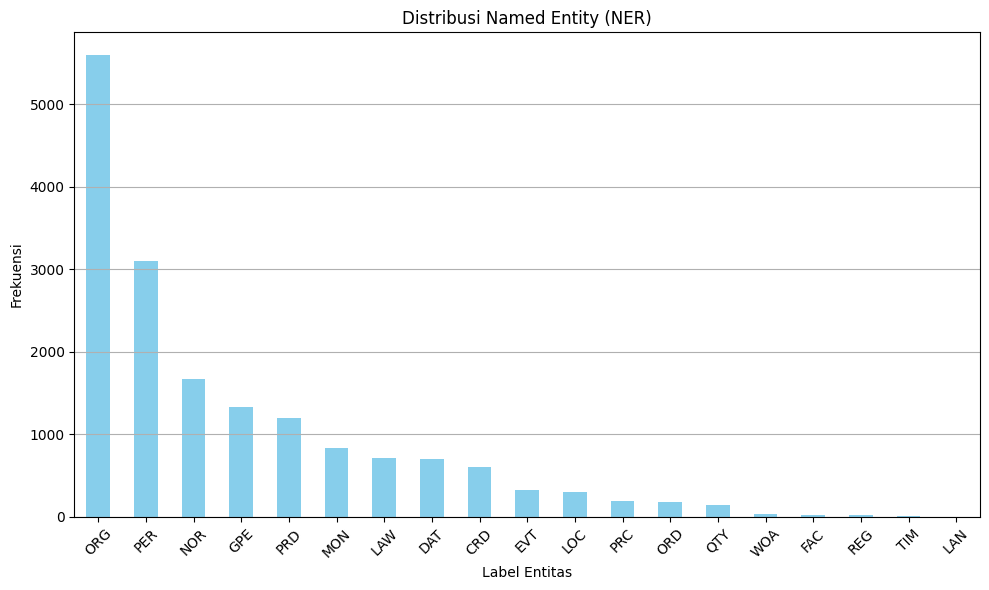

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah label NER
ner_counts = df_ner_detail['label'].value_counts()

# Plot bar chart
plt.figure(figsize=(10,6))
ner_counts.plot(kind='bar', color='skyblue')
plt.title("Distribusi Named Entity (NER)")
plt.xlabel("Label Entitas")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
df


,title,authors,source,published_date,summary,content,url,tag,polarity,subjectivity,original,tokens_awal,no_stopwords,stemmed,pos_tags,entities
0,Catatan Kritis Terhadap Danantara Indonesia,"Nurhastuti Kesumo Wardhani, Https, Www.Faceboo...",cnbcindonesia.com,2025-02-28 18:30:00,"Dalam konteks ekonomi, superholding sering kal...",Catatan: Artikel ini merupakan opini pribadi p...,https://www.cnbcindonesia.com/opini/2025022716...,opinion,0.062397,0.368904,catatan artikel ini merupakan opini pribadi p...,"['catatan', 'artikel', 'ini', 'merupakan', 'op...","['catatan', 'artikel', 'opini', 'pribadi', 'pe...","['catat', 'artikel', 'opini', 'pribadi', 'tuli...","[(Catatan, NOUN), (:, PUNCT), (Artikel, NOUN),...","[(cnbcindonesia, ORG), (com, ORG), (presiden r..."
1,Mampukah Danantara Bantu Prabowo Genjot Ekonom...,"Https, Www.Facebook.Com Cnnindonesia",cnnindonesia.com,2025-02-25 07:05:14,Pengamat menilai Danantara memerlukan waktu un...,--\n\nPresiden Prabowo Subianto resmi meluncur...,https://www.cnnindonesia.com/ekonomi/202502250...,economy,0.127432,0.442078,presiden prabowo subianto resmi meluncurkan ba...,"['presiden', 'prabowo', 'subianto', 'resmi', '...","['presiden', 'prabowo', 'subianto', 'resmi', '...","['presiden', 'prabowo', 'subianto', 'resmi', '...","[(--, PUNCT), (Presiden, PROPN), (Prabowo, PRO...","[(prabowo subianto, PER), (badan pengelola inv..."
2,Pro dan Kontra Danantara,NaN,medium.com,2025-02-22 04:01:59,"Danantara, atau secara resmi dikenal sebagai B...",Pro dan Kontra Danantara YONGOPI Follow 3 min ...,https://medium.com/@yongopi/pro-dan-kontra-dan...,economy,0.130567,0.456234,pro dan kontra danantara yongopi follow min r...,"['pro', 'dan', 'kontra', 'danantara', 'yongopi...","['pro', 'kontra', 'danantara', 'yongopi', 'fol...","['pro', 'kontra', 'danantara', 'yongopi', 'fol...","[(Pro, PROPN), (dan, CCONJ), (Kontra, PROPN), ...","[(danantara, ORG), (yongopi, PER), (3, CRD), (..."
3,Telur Emas Bernama Danantara,Ndoro Kakung,medium.com,2025-02-23 04:20:26,Minggu yang malas menjalar di mana-mana. Apala...,Telur Emas Bernama Danantara Ndoro Kakung Foll...,https://medium.com/@ndorokakung/dongeng-tentan...,opinion,0.179323,0.481294,telur emas bernama danantara ndoro kakung foll...,"['telur', 'emas', 'bernama', 'danantara', 'ndo...","['telur', 'emas', 'bernama', 'danantara', 'ndo...","['telur', 'emas', 'nama', 'danantara', 'ndoro'...","[(Telur, PROPN), (Emas, PROPN), (Bernama, PROP...","[(telur emas, PRD), (danantara ndoro kakung, P..."
4,Danantara: A New Paradigm in Indonesian Invest...,Muhammad Riduan,medium.com,2025-02-24 13:33:17,"On February 24, 2025, President Prabowo Subian...",Danantara: A New Paradigm in Indonesian Invest...,https://medium.com/@ri2n.faaz/danantara-a-new-...,opinion,0.105792,0.334185,danantara a new paradigm in indonesian invest...,"['danantara', 'a', 'new', 'paradigm', 'in', 'i...","['danantara', 'new', 'paradigm', 'indonesian',...","['danantara', 'new', 'paradigm', 'indonesian',...","[(Danantara, PROPN), (:, PUNCT), (A, PROPN), (...","[(danantara, ORG), (paradigm, PRD), (indonesia..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Menteri Prabowo Ajak Bill Gates Jadi Pengurus ...,"Kompas Cyber Media, Adhyasta Dirgantara, Ardit...",nasional.kompas.com,2025-05-07 00:00:00,Budi Gunadi Sadikin dan Rosan Roeslani mengaja...,"JAKARTA, KOMPAS.com - Menteri Kesehatan Budi G...",https://nasional.kompas.com/read/2025/05/07/14...,economy,0.088889,0.508333,jakarta kompas com menteri kesehatan budi g...,"['jakarta', 'kompas', 'com', 'menteri', 'keseh...","['menteri', 'kesehatan', 'budi', 'gunadi', 'sa...","['menteri', 'sehat', 'budi', 'gunadi', 'sadiki...","[(JAKARTA, PROPN), (,, PUNCT), (KOMPAS.com, PR...","[(jakarta, GPE), (kompas. com, ORG), (menteri ..."
222,Perusahaan Korsel Minta Pendanaan dari Dananta...,"Kompas Cyber Media, Elsa Catriana, Teuku Muham...",money.kompas.com,2025-04-29 00:00:00,"EcoPro, salah satu perusahaan asal Korea Selat...","JAKARTA, KOMPAS.com - EcoPro,

In [ ]:
import string
from nltk.corpus import stopwords

# Download stopwords NLTK (kalau belum)
import nltk
nltk.download('stopwords')

# Stopwords bahasa Inggris dan Indonesia
stopwords_eng = set(stopwords.words('english'))
stopwords_id = set(stopwords.words('indonesian'))

# Gabungkan dan lowercase semuanya
all_stopwords = stopwords_eng.union(stopwords_id)
all_stopwords = {word.lower() for word in all_stopwords}

# Buang tanda baca dan stopwords
# Convert string.punctuation to a list of characters
punctuation_list = list(string.punctuation)

df_filtered = df_detail[
    (~df_detail['word'].isin(punctuation_list)) &  # Bukan tanda baca (using ~ for negation)
    (~df_detail['word'].str.lower().isin(all_stopwords))   # Bukan stopword (using ~ for negation)
]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Hitung frekuensi kombinasi (word, pos)
top_filtered = df_filtered.groupby(['word', 'pos']).size().reset_index(name='count')

# Urutkan berdasarkan frekuensi tertinggi
top_filtered = top_filtered.sort_values(by='count', ascending=False)

# Tampilkan 20 teratas
print(top_filtered.head(20))


             word    pos  count
1335    Danantara  PROPN   2157
968          BUMN  PROPN    911
1933    Indonesia  PROPN    901
7388    investasi   NOUN    574
3237      Prabowo  PROPN    553
9343       negara   NOUN    473
4663         aset   NOUN    403
945           BPI  PROPN    383
3254     Presiden  PROPN    375
6422      ekonomi   NOUN    318
3465        Rosan  PROPN    304
12264           ”  PUNCT    286
2004    Investasi  PROPN    282
983         Badan  PROPN    268
2045      Jakarta  PROPN    264
5645         dana   NOUN    264
10106  perusahaan   NOUN    259
12263           “  PUNCT    240
9761   pemerintah   NOUN    235
2921           PT  PROPN    225


In [ ]:
# Hitung jumlah entitas berdasarkan nama dan label
top_ner = (
    df_ner_detail.groupby(['entity', 'label'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)

# Ambil 10 entitas teratas
top_ner.head(10)


,entity,label,count
1973,danantara,ORG,964
2907,indonesia,GPE,518
4475,prabowo,PER,356
3073,jakarta,GPE,249
4263,pemerintah,NOR,245
1694,bpi danantara,ORG,193
4480,prabowo subianto,PER,178
4850,rosan,PER,171
1735,bumn,ORG,129
3517,kpk,NOR,114


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_5['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='index', y='label', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='count', y='label', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)